### Computer Vision and Deep Learning, homework 2

Lev Svalov, l.svalov@innopolis.university <br>

**Reference**: code credit from [yoloV4 tutorial](https://blog.roboflow.com/training-yolov4-on-a-custom-dataset/)

### 1. Set up yoloV4

In [ ]:
!git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git

Cloning into 'pytorch-YOLOv4'...
remote: Enumerating objects: 398, done.
remote: Total 398 (delta 0), reused 0 (delta 0), pack-reused 398
Receiving objects: 100% (398/398), 926.53 KiB | 7.07 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [ ]:
%cd /content/pytorch-YOLOv4
!pip install -r requirements.txt
import os
os.kill(os.getpid(), 9)

/content/pytorch-YOLOv4
     |████████████████████████████████| 20.2 MB 1.5 MB/s 
     |████████████████████████████████| 753.4 MB 7.5 kB/s 
     |████████████████████████████████| 26.5 MB 3.5 MB/s 
     |████████████████████████████████| 12.6 MB 14.0 MB/s 
     |████████████████████████████████| 59 kB 5.6 MB/s 
     |████████████████████████████████| 124 kB 45.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0

In [ ]:
# download yolov4 weights that have already been converted to PyTorch
%cd /content/pytorch-YOLOv4/cfg/
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

/content/pytorch-YOLOv4/cfg
Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth
100% 170M/170M [00:01<00:00, 138MB/s]


### 2. Export my annotated dataset from roboflow project via link

In [ ]:
%cd /content/)
!curl -L https://app.roboflow.com/ds/J6RzjFj1Oy?key=NG2O6yWqS3 > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1505      0 --:--:-- --:--:-- --:--:--  1505
100 2237k  100 2237k    0     0  3138k      0 --:--:-- --:--:-- --:--:--  189M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: train/
 extracting: train/_annotations.txt  
 extracting: train/_classes.txt      
 extracting: train/photo-1441171205449-f600f908a9f3_jpeg.rf.30f32fc5b52145f6d28d68f36ba2eac8.jpg  
 extracting: train/photo-1441171205449-f600f908a9f3_jpeg.rf.7d8e00d418352578e2adb8545e7faeb8.jpg  
 extracting: train/photo-1473308822086-710304d7d30c_jpeg.rf.35c705d21eae044fa7ea5d52c1d6d123.jpg  
 extracting: train/photo-1473308822086-710304d7d30c_jpeg.rf.4cfe18302d36f745e94231b0f64ae314.jpg  
 extracting: train/photo-1480419821406-9cc94edb433c_jpeg.rf.5a41e8cb09bc2ac97ebf767d

In [ ]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%mkdir data
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

In [ ]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')

In [ ]:
print(num_classes) # 2 classes - pear and lamp

2


### 3. Train yoloV4 model

In [ ]:
!python ./pytorch-YOLOv4/train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 50

log file path:log/log_2021-11-29_11-53-39.txt
2021-11-29 11:53:40,048 train.py[line:435] INFO: Using device cuda
2021-11-29 11:53:42,595 train.py[line:282] INFO: Starting training:
        Epochs:          50
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   120
        Validation size: 16
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 2
        Train label path:train.txt
        Pretrained:
    
Epoch 1/50:   0%|        | 0/120 [00:00<?, ?img/s]/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/50:  32%|▎| 38/120 [00:20<00:36,  2.26img//usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, 

### 4. Get the results of object detection

In [ ]:
import os
test_images = ["valid/" + f for f in os.listdir('valid') if f.endswith('.jpg')]

In [ ]:
test_images

['valid/photo-1602096934132-ec3c50f55ec2_jpeg.rf.d617ab58a99e473e0c8340d4b5d3ae21.jpg',
 'valid/photo-1604591684189-86e88d006848_jpeg.rf.7d5db7f99767e39f57a27f4c50f3e4ef.jpg',
 'valid/photo-1544021770-7fe1de901890_jpeg.rf.f64ba5e192c626c4e47b17d09dbdf9b1.jpg',
 'valid/photo-1508345105453-e4abfea863c6_jpeg.rf.ee825ebad98d385495461682e3b83fa5.jpg',
 'valid/photo-1613925054466-df3b17123ca7_jpeg.rf.fcb44ac5e4236fbb746b9c67447d35ba.jpg',
 'valid/photo-1573675580577-58973eafd7ab_jpeg.rf.2ac00a1aa0f7c271f0af5613bfaeedb2.jpg',
 'valid/photo-1623951599201-287d9c2c2857_jpeg.rf.b1ad65528f08f5a9bc7e5fccf651ac80.jpg',
 'valid/photo-1612119422334-b407e510081d_jpeg.rf.8bad5897011e4f330fa41dd9e4fd1001.jpg',
 'valid/photo-1562051725-cc35a65c8227_jpeg.rf.2bcb2b8d3f77a46a600e19e37944ef64.jpg',
 'valid/photo-1520207625066-829dade7b91a_jpeg.rf.b8ef9edb161d5d0207d19865df704f0d.jpg',
 'valid/photo-1535868463750-c78d9543614f_jpeg.rf.4a30cc8e1f5b739ccd898346b04d1af0.jpg',
 'valid/photo-1464593745417-e22a78ca27

#### Obtain result

In [ ]:
%%time
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch50.pth 'valid/photo-1572530895190-89dd70849410_jpeg.rf.3ad30ef9e2b9b70031d9f54f0657eb47.jpg' valid/_classes.txt

pear: 0.999980
save plot results to predictions.jpg
CPU times: user 43.1 ms, sys: 10.8 ms, total: 53.8 ms
Wall time: 4.05 s


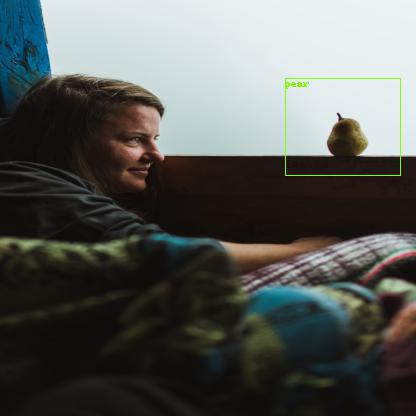

In [ ]:
from IPython.display import Image
Image('predictions.jpg')